## Pnorm and qnorm Tutorial

### Motivation for Normal Functions

Distributions serve as indispensable tools for modeling existing data, enabling us to handle uncertainty, quantify variability, and make inferential statements. One of the most prevalent distributions is the Normal Distribution, characterized by its mean \(μ > 0\) and standard deviation \(σ > 0\). This distribution is frequently employed to model real-world phenomena characterized by data clustering around a central value, proving particularly valuable in describing the distribution of diverse variables such as heights, weights, test scores, and errors in measurements.  

To visualize these distributions, Probability Density Function (PDF) and Cumulative Distribution Function (CDF) are commonly employed. The PDF represents the probability distribution of a continuous random variable and for the normal distribution the PDF is bell-shaped. The CDF, derived from the integral of the PDF, provides the probability that a random variable is less than or equal to a specified value.

The function pnorm and qnorm yield the cumulative probability for a specified quantile and vice versa. Additionally, these functions generate both the Probability Density Function (PDF) and Cumulative Distribution Function (CDF), providing a visual representation of the cumulative probability associated with a particular quantile. The CDF graph plots the cumulative probability against the specific quantile, while the PDF graph illustrates the cumulative probability up to that quantile through the area under the curve.

### Usage of pnorm and qnorm

Here we will demonstrate how to use `pnorm` and `qnorm` to answer simple statistical questions, via a dataset. 

Now, let us take a look at our Palmer penguins dataset! The Palmer penguins dataset by Allison Horst, Alison Hill, and Kristen Gorman was made publicly available as an R package. We shall use the dataset to conduct exploratory data analysis and utilize our developed functions. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let us say that we want to answer 2 questions:
1. What is the proportion of Adelie penguins that have flipper length longer than 200 mm?
2. What is the flipper length above which could be considered in top 5 percentile for Adelie penguins? 

Now, let us look at the distribution of flipper lengths first for Adelie's penguins first. We can see that it closely resembles normal distribution. 

There are 152 Adelie penguins in our sample


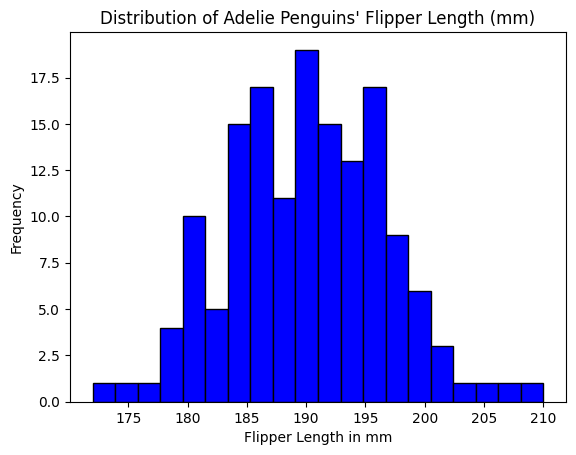

In [5]:
adelie_penguins = penguins[penguins['species']=='Adelie'].copy()
print(f"There are {adelie_penguins.shape[0]} Adelie penguins in our sample")

# Create a simple histogram to visualize the distribution
plt.hist(adelie_penguins['flipper_length_mm'], bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Adelie Penguins' Flipper Length (mm)")
plt.xlabel('Flipper Length in mm')
plt.ylabel('Frequency')
plt.show()

The distribution above closely resembles normal distribution. Hence, the self-developed `pnorm` and `qnorm` functions can be used to answer these statistical questions.

In [6]:
from mathdistops import pnorm
df, fig = pnorm(195, mean=adelie_penguins['flipper_length_mm'].mean(),
                 std_dev=adelie_penguins['flipper_length_mm'].std())
print(df)
fig

    Z-score  Cumulative probability
0  0.771678                0.779848


alt.HConcatChart(...)

Question 1: What is the proportion of Adelie penguins that have flipper length longer than 195 mm?

Answer: The proportion would be `1-0.78 = 0.22`.

The two charts (PDF/ CDF) helps to visualize our understanding. The quantile (X) at 195 is shown as a vertical dotted line on each chart. To the right, the CDF chart shows that the corresponding point where the vertical line intersects with the cumulative distribution curve has a cumulative probability value of 0.78.

In [7]:
from mathdistops import qnorm
df, fig = qnorm(0.95, mean=adelie_penguins['flipper_length_mm'].mean(),
                 std_dev=adelie_penguins['flipper_length_mm'].std())
print(df)
fig

     Quantile
0  200.710093


alt.HConcatChart(...)

Question 2: What is the flipper length above which could be considered in top 5 percentile for Adelie penguins? 

Answer: The quantile value for 95-percentile (1-5%) is calculated to be 200.7 mm. The percentile is shown as the horizontal dotted line on the right chart. The CDF chart shows that the corresponding point where the horizontal line intersects with the cumulative distribution curve has a quantile value of 200.7.

The above example has demonstrated how the self-defined functions can be used to calculate the answers for statistical questions while also visualize the answers simulteneously.